In [106]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
import subprocess
import urllib.request

import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

import time

In [108]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw_data

#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.phone.rw_pyphone as rw
import icewave.field.multi_instruments as multi

In [109]:
folder = '/Users/stephane/Documents/git/icewave/icewave/sensorDumper'

In [114]:
phonelist = ['00','01','03','04','05']
numlist = []
for phone in phonelist:
    numlist.append('1'+phone)
print(numlist)
#numlist =  ['219','139','148','122','243']

network = 2

import urllib.request
import subprocess

for phone in numlist:
    ip = f'192.168.{network}.{phone}'
    a = subprocess.run(['ping','-c','2',ip],text=True,stdout=True)
    

['100', '101', '103', '104', '105']
PING 192.168.2.100 (192.168.2.100) 56(84) bytes of data.
64 bytes from 192.168.2.100: icmp_seq=1 ttl=64 time=364 ms
64 bytes from 192.168.2.100: icmp_seq=2 ttl=64 time=92.1 ms

--- 192.168.2.100 ping statistics ---
2 packets transmitted, 2 received, 0% packet loss, time 1001ms
rtt min/avg/max/mdev = 92.146/228.271/364.397/136.125 ms
PING 192.168.2.101 (192.168.2.101) 56(84) bytes of data.
64 bytes from 192.168.2.101: icmp_seq=1 ttl=64 time=96.8 ms
64 bytes from 192.168.2.101: icmp_seq=2 ttl=64 time=206 ms

--- 192.168.2.101 ping statistics ---
2 packets transmitted, 2 received, 0% packet loss, time 1002ms
rtt min/avg/max/mdev = 96.809/151.416/206.024/54.607 ms
PING 192.168.2.103 (192.168.2.103) 56(84) bytes of data.
64 bytes from 192.168.2.103: icmp_seq=1 ttl=64 time=203 ms
64 bytes from 192.168.2.103: icmp_seq=2 ttl=64 time=22.4 ms

--- 192.168.2.103 ping statistics ---
2 packets transmitted, 2 received, 0% packet loss, time 1000ms
rtt min/avg/max/m

In [118]:
import socket, time,  urllib.request
import icewave.sensorDumper.time_sync as tsync

network = '2'

for phone in numlist:
    address = f"192.168.{network}.{phone}" # phone address

    #protocol command

    do_nothing = 0
    do_nothing_command = do_nothing.to_bytes(4, 'big', signed=False)
    respond = 1
    respond_command = respond.to_bytes(4, 'big', signed=False)
    stop = 2
    stop_command = stop.to_bytes(4, 'big', signed=False)

    socket.socket(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
    
    sock_send = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

    sock_receive.close()
    sock_receive = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    sock_receive.bind(("", 5001))

    sock_send.sendto(do_nothing_command, (address, 5000))

    # first query to warm up
    #except:
    #    print('initialisation fail')
    # activate udp sync on phone

    urllib.request.urlopen("http://" + address + ":8080/udp-sync").read()

    Dt = {}
    duration = []
    for i in range(1,4):
        Dt[i]=[]

    t0 = time.time()
    for i in range(200):
        #print(i)
        if np.mod(i,100)==0:
            print(i)
        t1 = time.time_ns()
        sock_send.sendto(respond_command, (address, 5000))
        t2 = time.time_ns()
        t_phone_bytes = sock_receive.recv(8)
        t3 = time.time_ns()
        #print(t3)
        t_phone = int.from_bytes(t_phone_bytes, byteorder='big')
        #print(str((t_phone-t1)/1000000) + "    " + str((t3-t_phone)/1000000) + "    " + str((t3-t1)/1000000))
        duration.append((t3-t1)*10**(-6))
        Dt[1].append((t1-t_phone)*10**(-6))
        Dt[2].append((t2-t_phone)*10**(-6))
        Dt[3].append((t3-t_phone)*10**(-6))
        # stop sync
    sock_send.sendto(stop_command, (address, 5000))

    tend = time.time()
    print(tend-t0)
    tlag = tsync.get_lag(Dt,duration)
    
    print(tlag)

OSError: [Errno 9] Bad file descriptor

In [91]:
for (num,phone) in zip(numlist,phonelist):
    tlag = get_lag(network,num)
    print(phone,tlag)

OSError: [Errno 98] Address already in use

In [20]:
import icewave.tools.rw_data as rw_data


ti = time.time()
duration = []
Dt = []
for i in range(1000):
#    print(i)
    a = subprocess.run(['bash','./autosyn.sh'],text=True,stdout=True)
    data = rw_data.read_csv('timelog/t0.txt')
    
    t0 = np.asarray(data[0][0]).astype(float)
    tphone = np.asarray(data[2][0]).astype(float)
    t1 = np.asarray(data[-1][0]).astype(float)
    duration.append(t1-t0)
    
    Dt.append(tphone-(t1+t0)/2)
    
tf = time.time()

print(f"Elapsed time : {tf-ti}")

Elapsed time : 98.18975377082825


In [26]:
data

[['1732271640.101387000'],
 [],
 ['1732271610.194995'],
 ['real 0.012988'],
 ['user 0.008403'],
 ['sys 0.004201'],
 [],
 [],
 ['real\t0m0.072s'],
 ['user\t0m0.004s'],
 ['sys\t0m0.003s'],
 ['1732271640.182078000']]

In [27]:
Dt = np.asarray(Dt)
duration = np.asarray(duration)

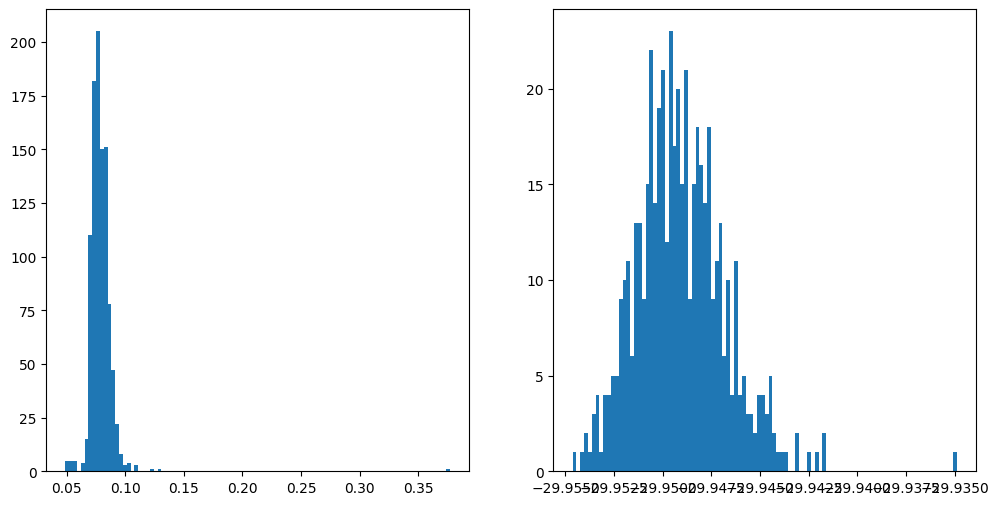

In [34]:
fig,axs = plt.subplots(figsize=(12,6),ncols=2)

axs[0].hist(duration,100)

tmedian = np.median(duration)
tmax = tmedian

indices = np.where(duration<tmax)[0]
#print(indices)
n = axs[1].hist(Dt[indices],100)

In [23]:
print(tmedian)

0.07779860496520996


In [35]:
moy = np.mean(Dt[indices])
std = np.std(Dt[indices])

print(moy,std*1000,std/np.sqrt(len(indices))*1000)

-29.94907578420639 2.2956260554095897 0.10266351821631084


In [97]:
sync.get_lag
print(t1-t0)

NameError: name 'sync' is not defined

In [48]:
network = '57'
phone = '219'
for phone in numlist:
    address = f"192.168.{network}.{phone}" # phone address
    urllib.request.urlopen("http://" + address + ":8080/udp-sync").read()

In [49]:
import socket
import SimpleHTTPServer
import socketserver # If using Python 3.0 or higher
# import SocketServer # If using Python 2.7, 
# import os # Uncomment if you want to change directories within the program

PORT = 8000

# Absolutely essential!  This ensures that socket resuse is setup BEFORE
# it is bound.  Will avoid the TIME_WAIT issue

class MyTCPServer(SocketServer.TCPServer):
    def server_bind(self):
        self.socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
        self.socket.bind(self.server_address)
    
Handler = SimpleHTTPServer.SimpleHTTPRequestHandler
    
httpd = MyTCPServer(("", PORT), Handler)
    
# os.chdir("/My/Webpages/Live/here.html")

httpd.serve_forever()

# httpd.shutdown() # If you want to programmatically shut off the server

ModuleNotFoundError: No module named 'SimpleHTTPServer'

b'Syncing via udp'

0
100
1.298712968826294
0
100
1.1574945449829102
0
100
1.8824524879455566
0
100
2.550691843032837
0
100
1.644434928894043


In [8]:
duration = np.asarray(duration)
for key in Dt.keys():
    Dt[key] = np.asarray(Dt[key])

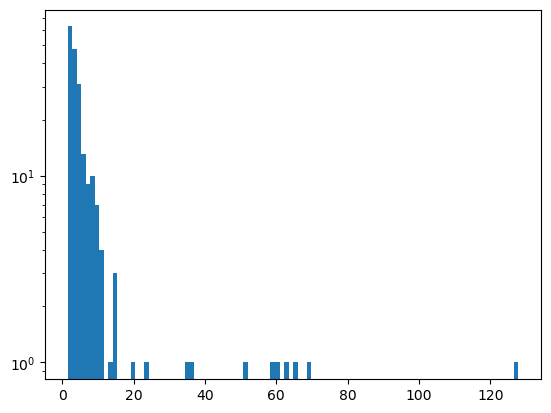

In [13]:
a = plt.hist(duration,100)
plt.yscale('log')

4.09
194
0.3263314602822092


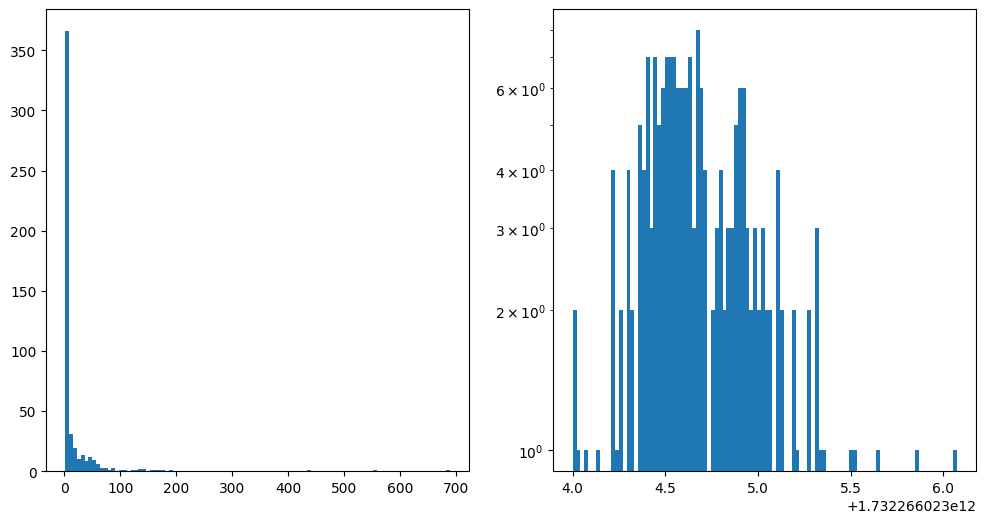

In [111]:
fig,axs = plt.subplots(figsize=(12,6),ncols=2)

axs[0].hist(duration,100)

tmedian = np.median(duration)
tmax = tmedian*0.8

print(tmax)

indices = np.where(duration<tmax)[0]
print(len(indices))
i = 3
n = axs[1].hist(Dt[i][indices],100)
print(np.std(Dt[i][indices]))
axs[1].set_yscale('log')
#axs[1]

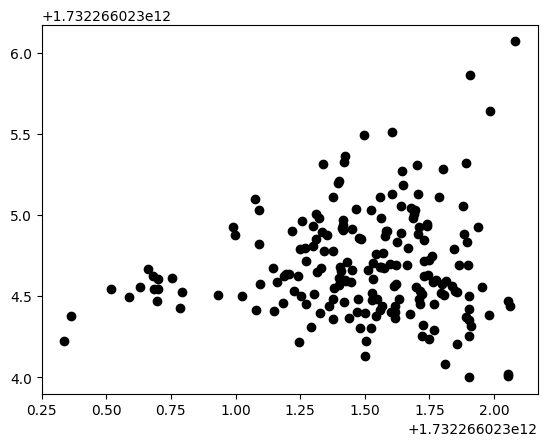

In [112]:
plt.plot(Dt[2][indices],Dt[3][indices],'ko')

0.48348348348348347


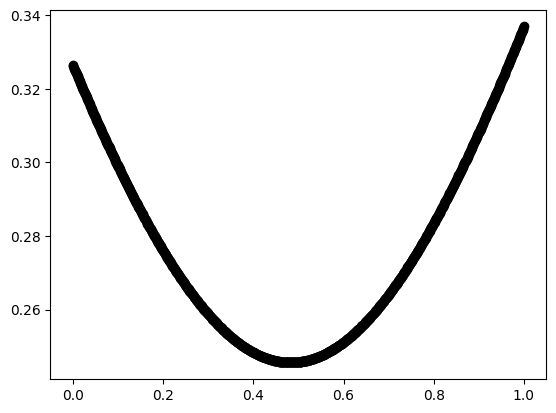

In [114]:
alphas = np.linspace(0,1,10**3)
mu = np.zeros(len(alphas))
for i,alpha in enumerate(alphas):
    mu[i] = np.std(Dt[1][indices]*alpha+Dt[3][indices]*(1-alpha))

plt.plot(alphas,mu,'ko')

print(alphas[np.argmin(mu)])